In [ ]:
%pip install -r ../requirements.txt

In [5]:
import os
import numpy as np
import librosa
from scipy import signal
import matplotlib.pyplot as plt
from qbstyles import mpl_style

mpl_style()

# Configuration
SIM_DIR = "../data/simulations/gunshot_0/"  # Path to one simulation
SAMPLE_RATE = 44100  # Must match your simulation sample rate

In [6]:
def get_delays(mic1, mic2, sr):
    """Calculate time delay between two mics in milliseconds"""
    corr = signal.correlate(mic1, mic2, mode='full')
    delay_samples = np.argmax(corr) - len(mic1)
    return (delay_samples / sr) * 1000  # Convert to milliseconds

In [7]:
# Load all 6 mic recordings
recordings = []
for mic_idx in range(1, 7):  # mics 1 through 6
    audio, _ = librosa.load(
        os.path.join(SIM_DIR, f"mic_{mic_idx}_recording.wav"),
        sr=SAMPLE_RATE
    )
    recordings.append(audio)
print(f"Loaded {len(recordings)} microphone recordings")

Loaded 6 microphone recordings


In [8]:
# Check all recordings have same duration
durations = [len(r)/SAMPLE_RATE for r in recordings]
assert len(set(durations)) == 1, f"Error: Mics have different durations {durations}"
print(f"✓ All mics have same duration: {durations[0]:.3f} seconds")

✓ All mics have same duration: 2.303 seconds


In [9]:
# Calculate delays relative to mic1 (in milliseconds)
delays = {}
for mic_idx in range(1, 6):  # Compare mic1 vs mic2-mic6
    delay_ms = get_delays(recordings[0], recordings[mic_idx], SAMPLE_RATE)
    delays[f"mic1 vs mic{mic_idx+1}"] = delay_ms
    print(f"mic1 → mic{mic_idx+1}: {delay_ms:.2f} ms delay")

mic1 → mic2: 2.04 ms delay
mic1 → mic3: 4.04 ms delay
mic1 → mic4: -4.10 ms delay
mic1 → mic5: -2.56 ms delay
mic1 → mic6: -3.17 ms delay


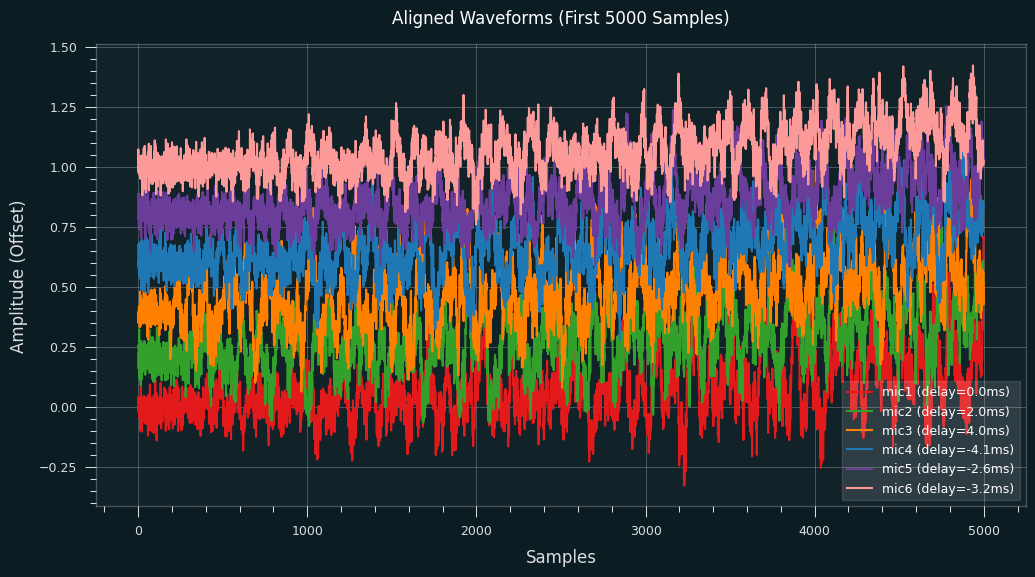

In [11]:
# Plot first 5000 samples (aligned with offsets)
plt.figure(figsize=(12, 6))
for mic_idx in range(6):
    plt.plot(
        recordings[mic_idx][:5000] + mic_idx*0.2,  # Offset for visibility
        label=f"mic{mic_idx+1} (delay={delays.get(f'mic1 vs mic{mic_idx+1}',0):.1f}ms)"
    )
plt.title("Aligned Waveforms (First 5000 Samples)")
plt.xlabel("Samples"); plt.ylabel("Amplitude (Offset)")
plt.legend()